<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Brainstorm:" data-toc-modified-id="Brainstorm:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Brainstorm:</a></span><ul class="toc-item"><li><span><a href="#Product:-The-good-and-the-bad" data-toc-modified-id="Product:-The-good-and-the-bad-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Product: The good and the bad</a></span></li><li><span><a href="#Segment-businesses-or-users-based-on-reviews.-Similar-businesses.-Similair-users." data-toc-modified-id="Segment-businesses-or-users-based-on-reviews.-Similar-businesses.-Similair-users.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Segment businesses or users based on reviews. Similar businesses. Similair users.</a></span></li><li><span><a href="#Guidance-for-businesses-to-improve-reviews" data-toc-modified-id="Guidance-for-businesses-to-improve-reviews-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Guidance for businesses to improve reviews</a></span></li><li><span><a href="#First-task:-Words-indicative-of-all-reviews" data-toc-modified-id="First-task:-Words-indicative-of-all-reviews-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>First task: Words indicative of all reviews</a></span></li></ul></li><li><span><a href="#Words-indicative-of-(5-star)-and-(1-star)-reviews" data-toc-modified-id="Words-indicative-of-(5-star)-and-(1-star)-reviews-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Words indicative of (5-star) and (1-star) reviews</a></span><ul class="toc-item"><li><span><a href="#Words-indicative-of-5-star-reviews" data-toc-modified-id="Words-indicative-of-5-star-reviews-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Words indicative of 5-star reviews</a></span></li><li><span><a href="#Words-indicative-of-1-star-reviews" data-toc-modified-id="Words-indicative-of-1-star-reviews-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Words indicative of 1-star reviews</a></span></li></ul></li></ul></div>

# Brainstorm:
## Product: The good and the bad
-- The good: , The bad: (for each business, a feature that summarizes the good reviews and one that summarizes the bad reviews

--Return the top words and phrases used in the 5-star reviews

--Return the top words and phrases used in the 1-star reviews

## Segment businesses or users based on reviews. Similar businesses. Similair users. 
## Guidance for businesses to improve reviews
-- Create a score for restaurants based on what customers care about in reviews (service, food, price, ...)

## First task: Words indicative of all reviews
-- 5-star reviews
-- 1-star reviews

# Words indicative of (5-star) and (1-star) reviews

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import the stop word list


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daviderickson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def load_reviews(size='small'): 
    if size == 'small':
        filename = r'../../data/small-review.json'
    elif size == 'full':
        filename = r'../../data/review.json'
    new_list = []
    for line in open(filename):
       new_list.append(json.loads(line))
    return pd.DataFrame.from_records(new_list)

dfreviews = load_reviews(size='small')

In [3]:
dfreviews['text'][0]

'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.'

In [4]:
# For simplicity, drop anything that isn't a letter
# Numbers and symbols may have interesting meaning and could be explore later

def lettersOnly(string):
    return re.sub("[^a-zA-Z]", " ", string) 

dfreviews['text'] = dfreviews['text'].apply(lettersOnly)


In [5]:
dfreviews['text'][0]

'Total bill for this horrible service  Over   Gs  These crooks actually had the nerve to charge us     for   pills  I checked online the pills can be had for    cents EACH  Avoid Hospital ERs at all costs '

In [6]:
def review_to_words(string):
    string = re.sub("[^a-zA-Z]", " ", string) # keep only letters. more complex model possible later
    words =  string.lower().split() # make everything lowercase. split into words
    stops = set(stopwords.words('english')) # create a fast lookup for stopwords
    words = [w for w in words if not w in stops] # remove stopwords
    return( " ".join( words )) # recombine review and return
    
# dfreviews['text'] = dfreviews['text'].apply(review_to_words) # apply to reviews in dataframe


In [7]:
dfreviews['text'] = dfreviews['text'].apply(review_to_words)

In [8]:
dfreviews['text'][0]

'total bill horrible service gs crooks actually nerve charge us pills checked online pills cents avoid hospital ers costs'

In [9]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(dfreviews['text'])

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [10]:
print(train_data_features.shape)

(1000, 5000)


In [11]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print(vocab)

['ab', 'aback', 'ability', 'able', 'absolute', 'absolutely', 'ac', 'accents', 'access', 'accessed', 'accessible', 'accessories', 'accommodate', 'accommodating', 'accompanied', 'accompany', 'accomplish', 'according', 'accordingly', 'account', 'accountable', 'ace', 'achieve', 'across', 'acrylic', 'act', 'acted', 'action', 'actions', 'active', 'actual', 'actually', 'ad', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'addressed', 'adds', 'adequate', 'adhesive', 'adjust', 'adjustments', 'admission', 'admit', 'admitted', 'adopting', 'adorable', 'adore', 'adult', 'advance', 'advantage', 'adventure', 'advertise', 'advertised', 'advise', 'affecting', 'afford', 'affordable', 'afraid', 'afternoon', 'aftertaste', 'afterwards', 'age', 'aged', 'agent', 'agents', 'ago', 'agree', 'agreed', 'agreement', 'ah', 'ahead', 'ahi', 'ai', 'aioli', 'air', 'airline', 'airport', 'airy', 'aisles', 'aka', 'al', 'alas', 'alcohol', 'alexander', 'alexia', 'alfredo', 'allergic', 'allergies', 'allo

## Words indicative of 5-star reviews

In [12]:
# Want to understand words predictive of 5-star reviews
# Make a label that is 5-star and build a model to predict
ydata = (dfreviews['stars'] == 5)
ydata.head()

0    False
1     True
2     True
3     True
4    False
Name: stars, dtype: bool

In [13]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, ydata )

Training the random forest...


In [14]:
wordImportances = pd.DataFrame(data=zip(vocab, forest.feature_importances_), columns=['Word', 'Importance'])
wordImportances.sort_values(by=['Importance'], axis=0, ascending=False, inplace=True)

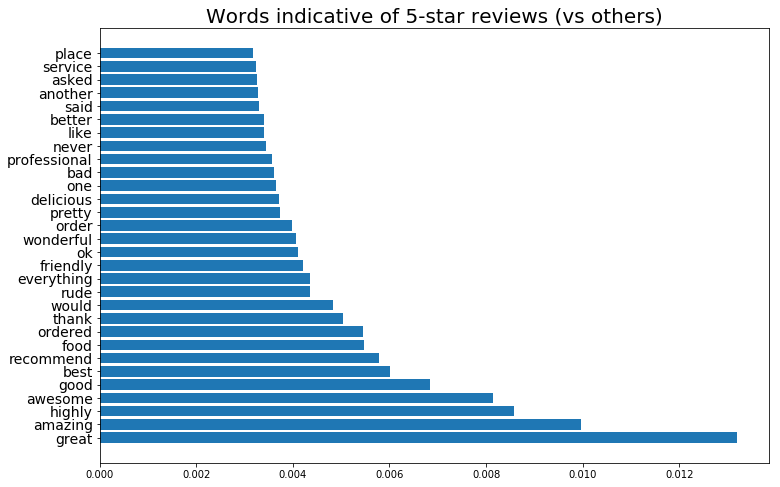

In [15]:
plt.figure(figsize=(12,8))
plt.barh(y='Word', width='Importance', data=wordImportances[:30]);
plt.yticks(rotation='horizontal', fontsize=14);
plt.title('Words indicative of 5-star reviews (vs others)', fontsize=20);

In [16]:
wordImportances.head(10)

,Word,Importance
1981,great,0.013206
109,amazing,0.009968
2103,highly,0.008571
270,awesome,0.008149
1950,good,0.006849
387,best,0.006012
3420,recommend,0.005781
1803,food,0.005481
2950,ordered,0.005446
4508,thank,0.005035


## Words indicative of 1-star reviews

In [17]:
# Want to understand words predictive of 5-star reviews
# Make a label that is 5-star and build a model to predict
ydata1 = (dfreviews['stars'] == 1)
ydata1.head()

0     True
1    False
2    False
3    False
4     True
Name: stars, dtype: bool

In [18]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest1 = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest1 = forest1.fit( train_data_features, ydata1 )

Training the random forest...


In [19]:
wordImportances1 = pd.DataFrame(data=zip(vocab, forest1.feature_importances_), columns=['Word', 'Importance'])
wordImportances1.sort_values(by=['Importance'], axis=0, ascending=False, inplace=True)

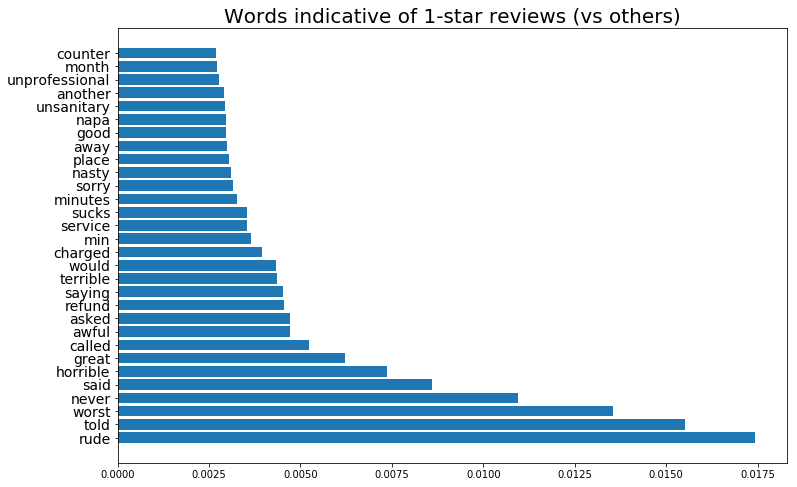

In [20]:
plt.figure(figsize=(12,8))
plt.barh(y='Word', width='Importance', data=wordImportances1[:30]);
plt.yticks(rotation='horizontal', fontsize=14);
plt.title('Words indicative of 1-star reviews (vs others)', fontsize=20);

In [21]:
df_wI5_wI1 = wordImportances.merge(wordImportances1, how='outer', on='Word', suffixes=('_5star', '_1star'))

In [22]:
df_wI5_wI1.sort_values(by=['Importance_5star'], axis=0, ascending=False, inplace=True)
df_wI5_wI1.head()

,Word,Importance_5star,Importance_1star
0,great,0.013206,0.006210
1,amazing,0.009968,0.001292
2,highly,0.008571,0.000382
3,awesome,0.008149,0.000360
4,good,0.006849,0.002970


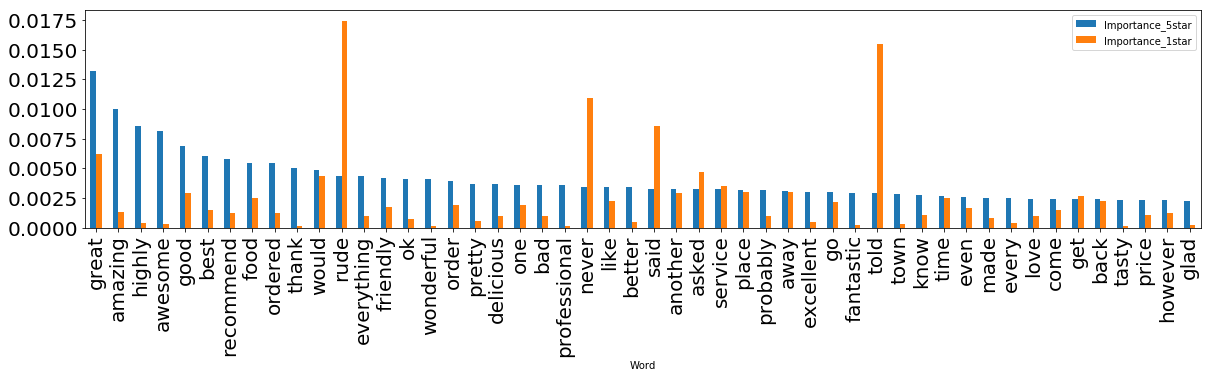

In [24]:

df_wI5_wI1[:50].plot(x='Word', y=['Importance_5star', 'Importance_1star'], kind='bar', 
                     figsize=(20,4), fontsize=20)

In [25]:
df_wI5_wI1['Word'][:30]

0            great
1          amazing
2           highly
3          awesome
4             good
5             best
6        recommend
7             food
8          ordered
9            thank
10           would
11            rude
12      everything
13        friendly
14              ok
15       wonderful
16           order
17          pretty
18       delicious
19             one
20             bad
21    professional
22           never
23            like
24          better
25            said
26         another
27           asked
28         service
29           place
Name: Word, dtype: object

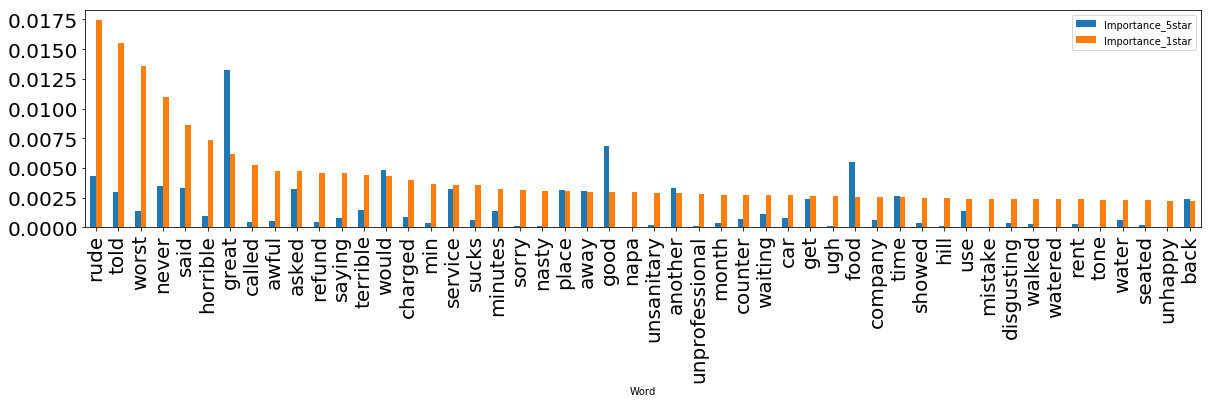

In [26]:

df_wI5_wI1.sort_values(by='Importance_1star', ascending=False)[:50].plot(x='Word', y=['Importance_5star', 'Importance_1star'], kind='bar', 
                     figsize=(20,4), fontsize=20)

In [27]:
df_wI5_wI1['Importance_5x1'] = df_wI5_wI1['Importance_1star'] * df_wI5_wI1['Importance_5star']

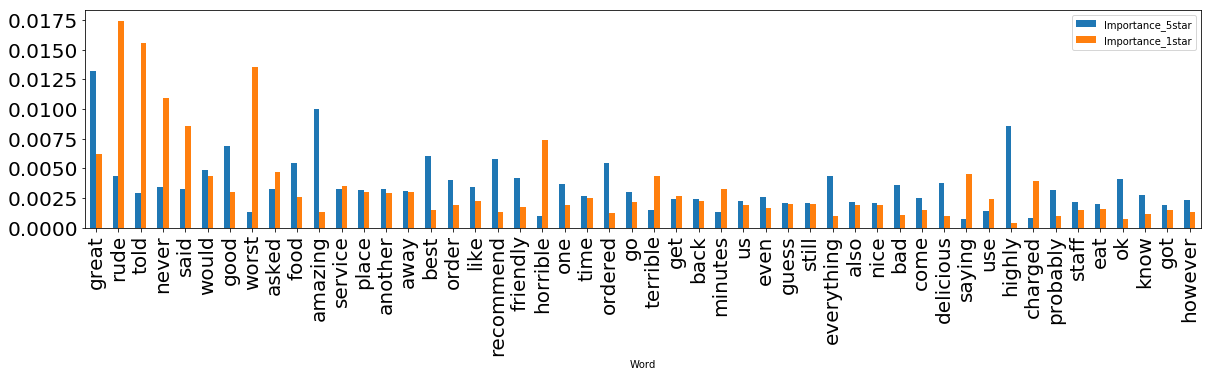

In [28]:

df_wI5_wI1.sort_values(by='Importance_5x1', ascending=False)[:50].plot(x='Word', y=['Importance_5star', 'Importance_1star'], kind='bar', 
                     figsize=(20,4), fontsize=20)